In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import requests
import io
import json
url = 'https://api.coindesk.com/v1/bpi/historical/close.json?start=2018-01-01&end=2018-02-14'


In [2]:
urlData = requests.get(url).content
rawData = pd.read_csv(io.StringIO(urlData.decode('utf-8')))

In [3]:
len(json.loads(urlData.decode('utf-8'))['bpi'].values())

45

In [4]:
keys = []
values = []
for i in json.loads(urlData.decode('utf-8'))['bpi'].values():
    values.append(i)
for i in json.loads(urlData.decode('utf-8'))['bpi'].keys():
    keys.append(i)


In [5]:
frame = DataFrame({'date':keys,'price':values})

In [6]:
def bollinger_band(bitcoin_price, win_size, num_std):
    rolling_mean = bitcoin_price.rolling(window=win_size).mean()
    rolling_std = bitcoin_price.rolling(window=win_size).std()
    upper_band = rolling_mean + (rolling_std*num_std)
    lower_band = rolling_mean - (rolling_std*num_std)
    
    return rolling_mean, upper_band, lower_band


In [7]:
#Upper and lower bollinger bands
x_mean, up, low = bollinger_band(DataFrame(values), 20, 1.5)

3 Degree Test MSE: 838132.0201588678
4 Degree Test MSE: 833534.5921315983
5 Degree Test MSE: 458505.2114646668


/anaconda3/envs/data-x/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.100767165047262e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/envs/data-x/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


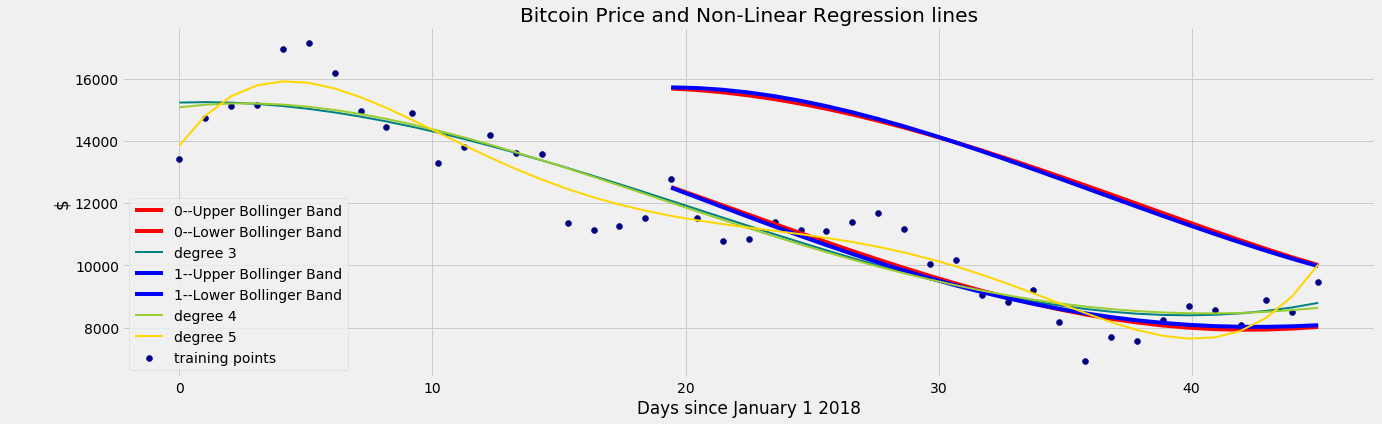

In [8]:

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


# generate points used to plot
x_plot = np.linspace(0, len(values), len(values))

# generate points and keep a subset of them

x = np.linspace(0, len(values), len(values))

y = values

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
colorss = ['red', 'blue']
lw = 2

plt.figure(figsize=(20, 6))

plt.scatter(x, y, color='navy', label="training points",)
#plt.plot(x, up, color='red', label="Upper Bollinger Band")
#plt.plot(x, low, color='blue', label="Lower Bollinger Band")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_predictions = model.predict(X_plot)
    x_mean, ups, lows = bollinger_band(DataFrame(y_predictions), 20, 1.5)
    if count != 2:
        plt.plot(x, ups, color=colorss[count], label=str(count)+"--Upper Bollinger Band")
        plt.plot(x, lows, color=colorss[count], label=str(count)+"--Lower Bollinger Band")
    error = mean_squared_error(y, y_predictions)
    print('%s Degree Test MSE: %s'%(degree, error))
    plt.plot(x_plot, y_predictions, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

x_mean, ups, lows = bollinger_band(DataFrame(y_predictions), 20, 1.5)
#plt.plot(x, ups, color='red', label="Upper Bollinger Band")
#plt.plot(x, lows, color='blue', label="Lower Bollinger Band")
plt.Circle((5, 5), 15, color='b', fill=True)
#ax = plt.gca()
#ax.add_artist(circle2)

ax = plt.axes()
plt.axes().annotate("hii", xy=(0.5, 0.5), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))

plt.title("Bitcoin Price and Non-Linear Regression lines")
plt.xlabel("Days since January 1 2018")
plt.ylabel("$")
plt.legend(loc='lower left')
#plt.xticks(keys)
plt.show()

#Better

In [9]:
#1.Segment buy and sell against local currency of bitcoin by region [Exchanges Level]

#Asia
##Korea
##China
##Japan

#Europe

#Americas
##US
##Canada
##Brazil
##Venezuela
##Argentina
##Colombia
##Mexico


#Same with ether && xrp && bitcoincash [Most purchases are not made using fiat money $ but using other crypto]

#2. Mining
#2.1 Bitcoin
## Transaction fees
## Mining block time

#2.2 Ethereum
## Transaction fees
## Mining block time
## Contracts
#



In [10]:
url2 = 'https://api.coindesk.com/v1/bpi/historical/close.json?start=2018-02-01&end=2018-02-14'

In [11]:
urlData2 = requests.get(url2).content
rawData = pd.read_csv(io.StringIO(urlData2.decode('utf-8')))
keys = []
values = []
for i in json.loads(urlData2.decode('utf-8'))['bpi'].values():
    values.append(i)
for i in json.loads(urlData2.decode('utf-8'))['bpi'].keys():
    keys.append(i)
    
frame = DataFrame({'date':keys,'price':values})

def bollinger_band(bitcoin_price, win_size, num_std):
    rolling_mean = bitcoin_price.rolling(window=win_size).mean()
    rolling_std = bitcoin_price.rolling(window=win_size).std()
    upper_band = rolling_mean + (rolling_std*num_std)
    lower_band = rolling_mean - (rolling_std*num_std)
    
    return rolling_mean, upper_band, lower_band
x_mean, up, low = bollinger_band(DataFrame(values), 20, 1.5)


In [12]:
frame

,date,price
0,2018-02-01,9052.5763
1,2018-02-02,8827.6300
2,2018-02-03,9224.3913
3,2018-02-04,8186.6488
4,2018-02-05,6914.2600
5,2018-02-06,7700.3863
6,2018-02-07,7581.8038
7,2018-02-08,8237.2363
8,2018-02-09,8689.8388
9,2018-02-10,8556.6125


In [13]:
len(values)

14

3 Degree Test MSE: 214099.1266905703
4 Degree Test MSE: 213735.2100765008
5 Degree Test MSE: 129295.5574953702


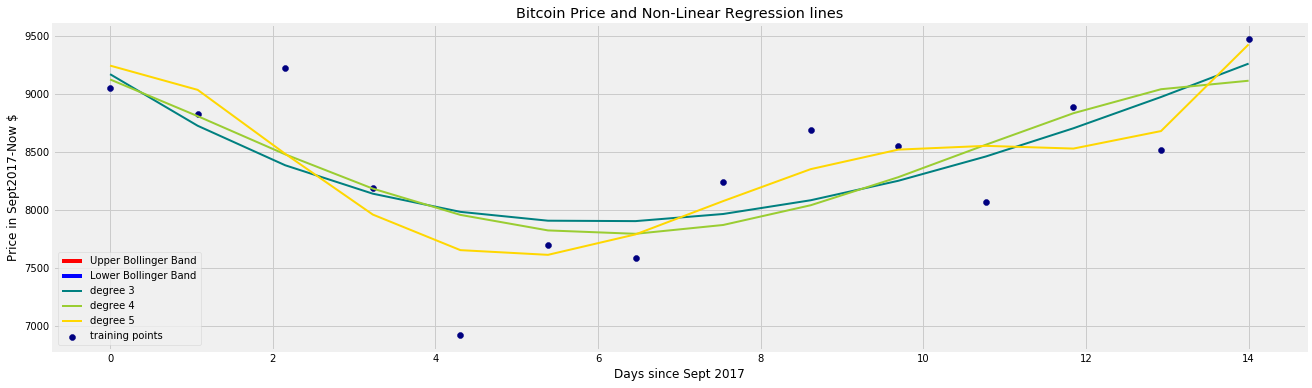

In [14]:
# generate points used to plot
x_plot = np.linspace(0, len(values), len(values))

# generate points and keep a subset of them

x = np.linspace(0, len(values), len(values))

y = values

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2

plt.figure(figsize=(20, 6))

plt.scatter(x, y, color='navy', label="training points",)
plt.plot(x, up, color='red', label="Upper Bollinger Band")
plt.plot(x, low, color='blue', label="Lower Bollinger Band")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_predictions = model.predict(X_plot)
    error = mean_squared_error(y, y_predictions)
    print('%s Degree Test MSE: %s'%(degree, error))
    plt.plot(x_plot, y_predictions, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.title("Bitcoin Price and Non-Linear Regression lines")
plt.xlabel("Days since Sept 2017")
plt.ylabel("Price in Sept2017-Now $")
plt.legend(loc='lower left')
#plt.xticks(keys)
plt.show()